# Practice Session 04: Networks from text

Author: <font color="white">Mario Muñoz Serrano</font>

E-mail: <font color="white">mario.munoz01@estudiant.upf.edu</font>

Date: <font color="white">30-10-2020</font>

# 1. The directed mentions network

In [ ]:
import io
import json
import gzip
import csv
import re
 
'''
DIRECTED MENTION NETWORK
 
Source node: author
Target node: re-tweeted or mentions account
 
Edge weight: number of mentions
 
UNDIRECTED CO-MENTION NETWORK
 
 
Source node: mentioned one
Target node: mentioned in the same tweet as mentioned one
 
Edge weight: number of of tweets in which the accounts are co-mentioned.
 
'''
 
 
 
def extract_mentions(text):
    return re.findall("@([a-zA-Z0-9_]{5,20})", text)
 
 
def counting_mentions(author, mentions, mentions_counter, co_mentions_mode):
    key = None
    for mention in mentions:
        if co_mentions_mode is True:
            for mention2 in mentions:
                if mention < mention2:
                    key = (mention, mention2)
        else:
            key = (author, mention)
        if key in mentions_counter:
            mentions_counter[key] += 1
        else:
            if key is not  None:
                mentions_counter[key] = 1
 
 
def export_data_to_csv(OUTPUT_FILENAME, mentions_counter, weight_filter):
    if weight_filter is None:
        with io.open(OUTPUT_FILENAME, "w") as output_file:
            writer = csv.writer(output_file, delimiter='\t', quotechar='"')
            writer.writerow(["Source", "Target", "Weight"])
            for key in mentions_counter:
                author = key[0]
                mention = key[1]
                weight = mentions_counter[key]
                writer.writerow([author, mention, weight])
    else:
        with io.open(OUTPUT_FILENAME, "w") as output_file:
            writer = csv.writer(output_file, delimiter='\t', quotechar='"')
            writer.writerow(["Source", "Target", "Weight"])
            for key in mentions_counter:
                author = key[0]
                mention = key[1]
                weight = mentions_counter[key]
                if weight >= weight_filter:
                    writer.writerow([author, mention, weight])
 
 
def structure_origin_data(COMPRESSED_INPUT_FILENAME, mentions_counter, co_mentions_mode):
    with gzip.open(COMPRESSED_INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
        for line in input_file:
            tweet = json.loads(line)
            author = tweet["user"]["screen_name"]
            message = tweet["full_text"]
            mentions = extract_mentions(message)
            counting_mentions(author, mentions, mentions_counter, co_mentions_mode)
 
 
def cleanData_with_edge_weight(COMPRESSED_INPUT_FILENAME, OUTPUT_FILENAME, edge_weight, co_mentions_mode):
    if edge_weight is None:
        mentions_counter = {}
        structure_origin_data(COMPRESSED_INPUT_FILENAME, mentions_counter, co_mentions_mode)
        export_data_to_csv(OUTPUT_FILENAME, mentions_counter, None)
    else:
        mentions_counter = {}
        structure_origin_data(COMPRESSED_INPUT_FILENAME, mentions_counter, False)
        export_data_to_csv(OUTPUT_FILENAME, mentions_counter, edge_weight)
 
 
cleanData_with_edge_weight("CovidLockdownCatalonia.json.gz", 'mentions.csv', None, False)
 
cleanData_with_edge_weight("CovidLockdownCatalonia.json.gz", 'mentions_weight_two_or_bigger.csv', 2, False)

## Mentions network visualization

<font size="+1" color="white">\[Mentions graph\]\(mentions.png\)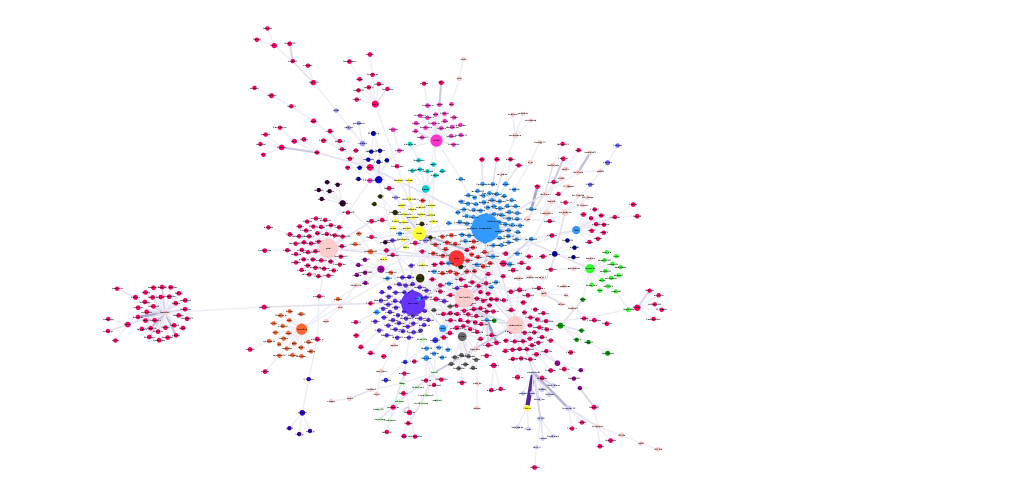</font>

<font size="+1" color="white">[Mentions graph degree distribution\]\(mentions-degree-distribution.png\)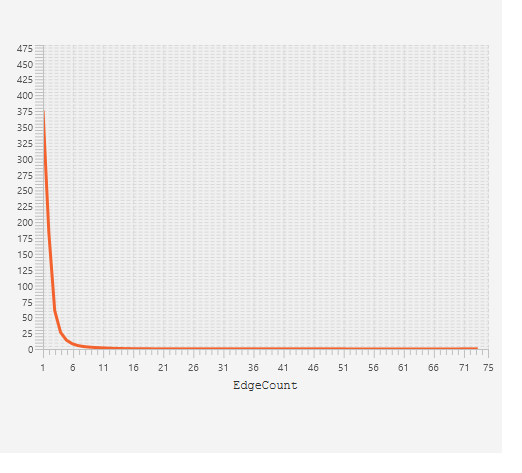</font>

<font size="" color="white">Related to this graph, we observe several important aspects. First, with respect to nodes with a higher degree, they tend to appear in the center of the network, while nodes appearing outside tend to have a lower degree. But also if we get a little closer, we see that the accounts with a higher degree are institutional accounts, mainly due to the spread of the containment measures they have adopted, as well as the reaction of different groups to these measures. Second, in terms of network characteristics, we observe how the indegree of most nodes is very small and their size is very similar, which is explained by the fact that, although there are 699 nodes, there are only 791 edges.</font>

# 2. The undirected co-mention network

In [ ]:
cleanData_with_edge_weight("CovidLockdownCatalonia.json.gz", 'comentions.csv', None, True)

## Co-mentions network visualization

Style the network so that line widths are larger for edges with large weights, and node sizes are larger for nodes with large degrees. Remember you need to run the network analyzer first.

Use ``Layout > Prefuse Force Directed Layout > All Nodes > Weight`` to create a layout by edge weight.

Run the ClusterMaker2 plug-in to create a clustering of this graph using the *Weight* attribute as weight. Use the resulting clusters to color the nodes.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="white">\[Co-mentions graph\]\(co_mentions.png\)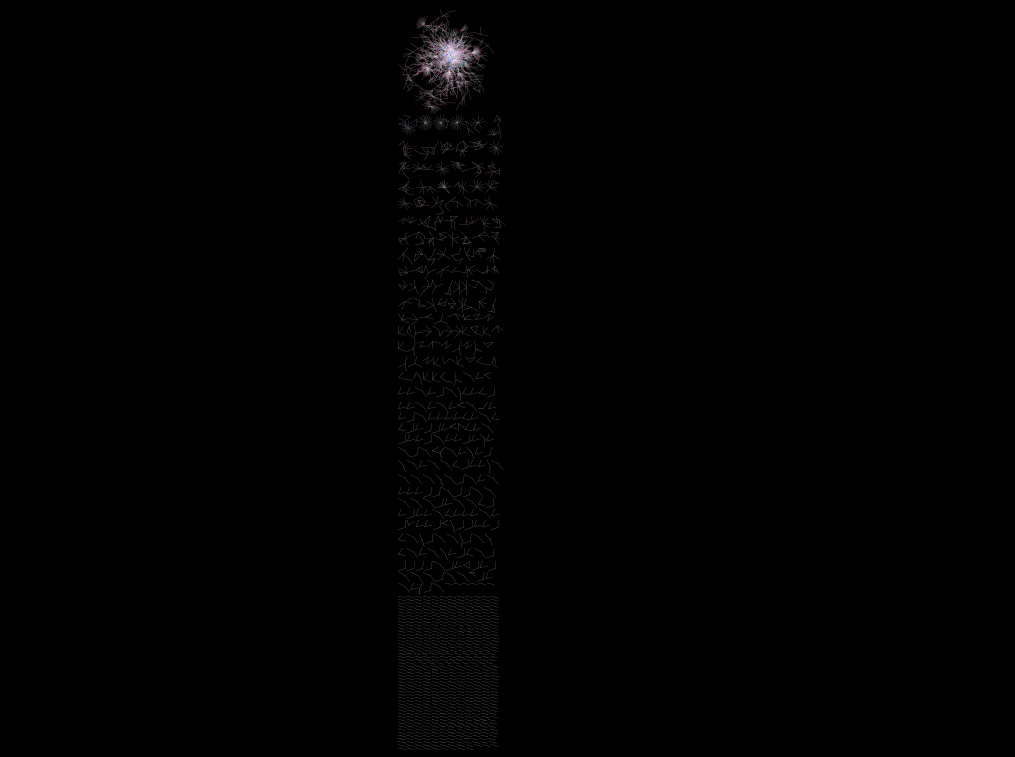</font>

<font size="+1" color="white">In relation to the previous network, we can see how twitter accounts with a significant number of co-mentions and with a larger degree are accounts with a large volume of followers, but mainly due to significant activity during the months of confinement. Either to react against his policies, as well as for the proximity of the November elections in the United States in the case of Donald Trump. Also for his political activity during these months on behalf of Vox trying to channel the impact of the pandemic to weaken the Spanish government. As well as institutional accounts such as the government of the Generalitat or salutcat in relation to the measures and information of the same during these months of confinement.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>